# ML_Ng Homework 4

In [227]:
%matplotlib inline
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

##  Part 1: Loading and Visualizing Data 
We start the exercise by first loading and visualizing the dataset.
You will be working with a dataset that contains handwritten digits.

### Load Training Data

In [228]:
mat_contents = sio.loadmat('ex4data1.mat')
X = mat_contents['X']
y = mat_contents['y']
m,n = X.shape
num_labels = 10
input_layer_size  = n;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units

### Randomly Pick 100 data point to display

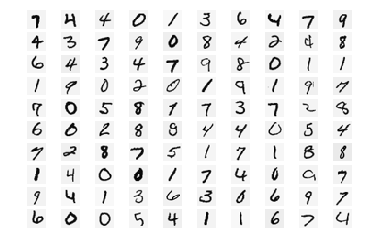

In [248]:
def display_data(X):
    #plt.figure(1)
    m,n = X.shape
    example_size = int(np.sqrt(n))
    grid_size = int(np.sqrt(m))
    for i in range(m):
        plt.subplot(grid_size,grid_size,i+1)
        plt.axis('off')
        plt.imshow(X[i,:].reshape((example_size,example_size)).T, cmap='gray_r')

rand_indices = np.random.randint(m, size=(100,))
sel = X[rand_indices, :]
display_data(sel)

## Part 2: Loading Parameters
In this part of the exercise, we load some pre-initialized 
neural network parameters.
Load the weights into variables Theta1 and Theta2

In [230]:
mat_contents = sio.loadmat('ex4weights.mat')
Theta1 = mat_contents['Theta1']
Theta2 = mat_contents['Theta2']
nn_params = np.append(Theta1.flatten('F'), Theta2.flatten('F'))

## Part 3: Compute Cost (Feedforward)
To the neural network, you should first start by implementing the
feedforward part of the neural network that returns the cost only. You
should complete the code in nnCostFunction.m to return cost. After
implementing the feedforward to compute the cost, you can verify that
your implementation is correct by verifying that you get the same cost
as us for the fixed debugging parameters.

We suggest implementing the feedforward cost *without* regularization
first so that it will be easier for you to debug. Later, in part 4, you
will get to implement the regularized cost.

In [231]:
def sigmoid(z):
    g = np.zeros(np.atleast_1d(z).size)
    g = 1 / (1 + np.exp(-z))
    return g

def sigmoid_gradient(z):
    g = sigmoid(z) * (1 - sigmoid(z))
    return g

def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb):
    # NNCOSTFUNCTION Implements the neural network cost function for a two layer
    # neural network which performs classification
    #    [J grad] = NNCOSTFUNCTON(nn_params, hidden_layer_size, num_labels, ...
    #    X, y, lambda) computes the cost and gradient of the neural network. The
    #    parameters for the neural network are "unrolled" into the vector
    #    nn_params and need to be converted back into the weight matrices. 

    #    The returned parameter grad should be a "unrolled" vector of the
    #    partial derivatives of the neural network.

    #  Setup some useful variables

    m, n = X.shape
    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # for our 2 layer neural network
    Theta1 = nn_params[0:(hidden_layer_size * (n + 1))].reshape((hidden_layer_size, n + 1), order='F')
    Theta2 = nn_params[(hidden_layer_size * (n + 1)):].reshape((num_labels, (hidden_layer_size + 1)), order='F')


    # You need to return the following variables correctly 
    J = 0
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)

    # Part 1: Feedforward the neural network and return the cost in the variable J.
    a1 = np.column_stack((np.ones((m,1)), X))
    z2 = a1 @ Theta1.T
    a2 = np.column_stack((np.ones((m,1)), sigmoid(z2)))
    z3 = a2 @ Theta2.T
    a3 = sigmoid(z3)
    h = a3

    # transform the y of integers into a matrix with a 1  representing the position of it
    y_m = np.zeros((m,num_labels))
    for i in range(m):
        # using i - 1 to offset the way the octave file uses index 10 to represent 0
        y_m[i,(y[i] - 1)] = 1
        y_mi = y_m[i,:].reshape((1,num_labels))
        hi = h[i,:].reshape((1,num_labels))
        J = J + 1/m * ((-y_mi @ np.log(hi).T) - ((1 - y_mi) @ np.log(1 - hi).T))
    J_reg = lamb/(2*m) * (np.sum(np.sum(np.power(Theta1[:,1:],2))) + np.sum(np.sum(np.power(Theta2[:,1:],2))))
    J += J_reg
    
    # Part 2: Implement the backpropagation algorithm to compute the gradients
    #      Theta1_grad and Theta2_grad. You should return the partial derivatives of
    #      the cost function with respect to Theta1 and Theta2 in Theta1_grad and
    #      Theta2_grad, respectively. After implementing Part 2, you can check
    #      that your implementation is correct by running checkNNGradients

    #      Note: The vector y passed into the function is a vector of labels
    #            containing values from 1..K. You need to map this vector into a 
    #            binary vector of 1's and 0's to be used with the neural network
    #            cost function.

    #      Hint: We recommend implementing backpropagation using a for-loop
    #            over the training examples if you are implementing it for the 
    #            first time.


    # why use element-wise multiplication for sigmoidGradient?
    d3 = h - y_m
    d2 = (d3 @ Theta2[:,1:]) * sigmoid_gradient(z2)
    delta_1 = d2.T @ a1
    delta_2 = d3.T @ a2 
    
    Theta1_grad = 1/m * delta_1
    Theta2_grad = 1/m * delta_2
    
    # Part 3: Implement regularization with the cost function and gradients.

    #      Hint: You can implement this around the code for
    #            backpropagation. That is, you can compute the gradients for
    #            the regularization separately and then add them to Theta1_grad
    #            and Theta2_grad from Part 2.
    
    t1 = Theta1
    t1[:,0] = 0
    grad_reg1 = lamb/m * t1
    Theta1_grad += grad_reg1
    
    t2 = Theta2
    t2[:,0] = 0
    grad_reg2 = lamb/m * t2
    Theta2_grad += grad_reg2

    
    # Unroll gradients
    grad = np.append(Theta1_grad.flatten('F'), Theta2_grad.flatten('F'))
    
    return J, grad

In [232]:
# Cost without regularization. This value should be about 0.287629
lamb = 0
nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb)

(array([[0.28762917]]),
 array([ 6.18712766e-05,  9.38798109e-05, -1.92593606e-04, ...,
         1.27957448e-03,  1.35707295e-03,  7.73329872e-04]))

In [233]:
# Cost with regularization. this value should be about 0.383770
lamb = 1
nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb)

(array([[0.4205256]]),
 array([-0.00451821, -0.00153689, -0.00774072, ...,  0.00616415,
         0.00260424,  0.00256306]))

## Part 5: Sigmoid Gradient 
Before you start implementing the neural network, you will first
implement the gradient for the sigmoid function. You should complete the
code in the sigmoidGradient.m file.

In [234]:
sigmoid_gradient(np.array([-1, -0.5, 0, 0.5, 1]))

array([0.19661193, 0.23500371, 0.25      , 0.23500371, 0.19661193])

## Part 6: Initializing Pameters
In this part of the exercise, you will be starting to implment a two
layer neural network that classifies digits. You will start by
implementing a function to initialize the weights of the neural network
(randInitializeWeights.m)

In [235]:
def randInitializeWeights(L_in, L_out):
    # RANDINITIALIZEWEIGHTS Randomly initialize the weights of a layer with L_in
    # incoming connections and L_out outgoing connections
    # W = RANDINITIALIZEWEIGHTS(L_in, L_out) randomly initializes the weights 
    # of a layer with L_in incoming connections and L_out outgoing 
    # connections. 

    # Note that W should be set to a matrix of size(L_out, 1 + L_in) as
    # the first column of W handles the "bias" terms
    # You need to return the following variables correctly 
    W = np.zeros((L_out, 1 + L_in))

    # Randomly initialize the weights to small values
    epsilon_init = 0.12
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
    return W
           
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.append(initial_Theta1, initial_Theta2);
initial_nn_params

array([-0.11977788,  0.06739839, -0.06485077, ..., -0.00348629,
        0.10131839, -0.03821422])

## Part 8: Training NN
You have now implemented all the code necessary to train a neural 
network. To train your neural network, we will now use "fmincg", which
is a function which works similarly to "fminunc". Recall that these
advanced optimizers are able to train our cost functions efficiently as
long as we provide them with the gradient computations.

In [250]:
from scipy.optimize import minimize
result = minimize(fun=nnCostFunction, x0=initial_nn_params, jac=True, method='CG', options={'maxiter': 500}, args=(input_layer_size, hidden_layer_size, num_labels, X, y, lamb)) 
result

     fun: 0.3158051844307797
     jac: array([-7.91919361e-05,  1.34208262e-04,  2.83758681e-05, ...,
       -3.64659675e-05, -7.08539981e-05, -1.31323404e-05])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 1160
     nit: 500
    njev: 1160
  status: 1
 success: False
       x: array([ 1.26764245, -1.16121099, -0.35313486, ..., -4.21909278,
        0.97619437, -2.42593793])

In [253]:
# Obtains Theta1 and Theta2 back from params
Theta1 = result.x[0:(hidden_layer_size * (n + 1))].reshape((hidden_layer_size, n + 1), order='F')
Theta2 = result.x[(hidden_layer_size * (n + 1)):].reshape((num_labels, (hidden_layer_size + 1)), order='F')

## Part 9: Visualize Weights
You can now "visualize" what the neural network is learning by 
displaying the hidden units to see what features they are capturing in 
the data.

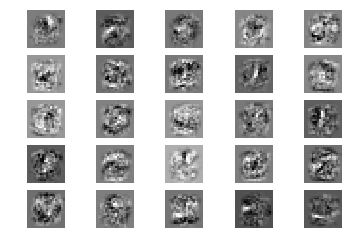

In [254]:
display_data(Theta1[:,1:])

## Part 10: Implement Predict 
After training the neural network, we would like to use it to predict
the labels. You will now implement the "predict" function to use the
neural network to predict the labels of the training set. This lets
you compute the training set accuracy.

In [246]:
def predict(Theta1, Theta2, X):
    m,n = X.shape
    num_labels = Theta2.shape[0]
    p = np.zeros((m,1))
    
    a1 = np.column_stack((np.ones((m,1)), X))
    a2 = sigmoid(a1 @ Theta1.T)
    a2 = np.column_stack((np.ones((m,1)), a2))
    h = sigmoid(a2 @ Theta2.T)
    # adding 1 to max index because Octave/Matlab's count starts at 1
    p = (np.argmax(h, axis = 1) + 1).reshape((m,1))
    return p

pred = predict(Theta1, Theta2, X)
print(f'Training Set Accuracy: {np.mean((pred == y) * 100)}%')

Training Set Accuracy: 97.52%
